# Webscraping some stock market data and analysing it

## Libraries

In [1]:
import requests
from bs4 import BeautifulSoup

## Scraping Daily FTSE 100 Data From London Stock Exchange Website

In [2]:
# get website for the ftse 100
url = 'https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=1'
website = requests.get(url).text
soup = BeautifulSoup(website, 'lxml')

In [3]:
# check if access to website
requests.get(url)

<Response [200]>

#### Company code, name, currency, market cap, price, change, change %

In [4]:
# create empty list to append to
code, name, currency, mc, price, change, p_change = ([] for i in range(7))

In [5]:
# get all data
company_code = soup.find_all(class_='clickable bold-font-weight instrument-tidm gtm-trackable td-with-link')
company_name = soup.find_all(class_='clickable instrument-name gtm-trackable td-with-link')
company_currency = soup.find_all(class_='instrument-currency hide-on-landscape')
company_mc = soup.find_all(class_='instrument-marketcapitalization hide-on-landscape')
company_price = soup.find_all(class_='instrument-lastprice')
company_change = soup.find_all(class_='instrument-netchange hide-on-landscape positivechange')
company_p_change = soup.find_all(class_='instrument-percentualchange hide-on-landscape gtm-trackable')

In [6]:
# append to list
for x in range(len(company_code)):
    code.append(company_code[x].text)
    name.append(company_name[x].text)
    currency.append(company_currency[x].text)
    mc.append(company_mc[x].text)
    price.append(company_price[x].text)
    change.append(company_change[x].text)
    p_change.append(company_p_change[x].text)

In [7]:
# print data to check
print(code)
print(name)
print(len(code))
print(len(name))

['SN.', 'RMG', 'FERG', 'RR.', 'SKG', 'GLEN', 'SHEL', 'TSCO', 'ENT', 'SMIN', 'BDEV', 'SBRY', 'BME', 'PSH', 'IMB', 'LLOY', 'NXT', 'DCC', 'PSN', 'NWG']
['SMITH & NEPHEW PLC ORD USD0.20', 'ROYAL MAIL PLC ORD 1P', 'FERGUSON PLC ORD 10P', 'ROLLS-ROYCE HOLDINGS PLC ORD SHS 20P', 'SMURFIT KAPPA GROUP PLC ORD EUR0.001 (CDI)', 'GLENCORE PLC ORD USD0.01', 'SHELL PLC ORD EUR0.07', 'TESCO PLC ORD 6 1/3P', 'ENTAIN PLC ORD EUR0.01', 'SMITHS GROUP PLC ORD 37.5P', 'BARRATT DEVELOPMENTS PLC ORD 10P', 'SAINSBURY(J) PLC ORD 28 4/7P', 'B&M EUROPEAN VALUE RETAIL S.A. ORD 10P (DI)', 'PERSHING SQUARE HOLDINGS LTD ORD NPV', 'IMPERIAL BRANDS PLC ORD 10P', 'LLOYDS BANKING GROUP PLC ORD 10P', 'NEXT PLC ORD 10P', 'DCC PLC ORD EUR0.25 (CDI)', 'PERSIMMON PLC ORD 10P', 'NATWEST GROUP PLC ORD 100P']
20
20


#### Now loop through all the pages

In [8]:
import re # add regex to as one of the classes slightly differ, so had to make sure it gets all of them

In [9]:
# create empty list to append to
code, name, currency, mc, price, change, p_change = ([] for i in range(7))

In [10]:
# create a function to scrape the data, which will be used over 5 different pages
def data_collection():
    # get all data
    company_code = soup.find_all(class_=re.compile('clickable bold-font-weight instrument-tidm gtm-trackable td-with-link'))
    company_name = soup.find_all(class_=re.compile('clickable instrument-name gtm-trackable td-with-link'))
    company_currency = soup.find_all(class_=re.compile('instrument-currency hide-on-landscape'))
    company_mc = soup.find_all(class_=re.compile('instrument-marketcapitalization hide-on-landscape'))
    company_price = soup.find_all(class_=re.compile('instrument-lastprice'))
    company_change = soup.find_all(class_=re.compile('instrument-netchange hide-on-landscape'))
    company_p_change = soup.find_all(class_=re.compile('instrument-percentualchange hide-on-landscape gtm-trackable'))

    # append to list
    for x in range(len(company_code)):
        code.append(company_code[x].text)
        name.append(company_name[x].text)
        currency.append(company_currency[x].text)
        mc.append(company_mc[x].text)
        price.append(company_price[x].text)
        change.append(company_change[x].text)
        p_change.append(company_p_change[x].text)

In [11]:
# find out how many pages to iterate over
list_of_pages = soup.find_all('a', class_='page-number')
print(len(list_of_pages))

5


In [12]:
# loop through each website page
n = 1 # start iteration at page 1

while n < len(list_of_pages) + 1:
    url = f'https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page={n}'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    
    # run function to scrape
    data_collection()
    print(url)
    
    # count
    n += 1

https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=1
https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=2
https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=3
https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=4
https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=5


In [13]:
# verify
print(len(code), len(change), len(name))
print(code)

100 100 100
['SN.', 'RMG', 'FERG', 'RR.', 'SKG', 'GLEN', 'SHEL', 'TSCO', 'ENT', 'SMIN', 'BDEV', 'SBRY', 'BME', 'PSH', 'IMB', 'LLOY', 'NXT', 'DCC', 'PSN', 'NWG', 'ANTO', 'HSBA', 'HWDN', 'AAF', 'KGF', 'CRH', 'HIK', 'MNDI', 'BKG', 'BATS', 'BP.', 'OCDO', 'EDV', 'PHNX', 'AV.', 'AHT', 'AVV', 'TW.', 'III', 'BNZL', 'STAN', 'WPP', 'AVST', 'ABF', 'MNG', 'BARC', 'IHG', 'SMDS', 'WTB', 'ULVR', 'SGRO', 'BRBY', 'MGGT', 'AAL', 'AZN', 'SSE', 'AUTO', 'SGE', 'CPG', 'IAG', 'DPH', 'PSON', 'BT.A', 'BA.', 'CCH', 'GSK', 'ECM', 'HL.', 'LGEN', 'HLMA', 'FRES', 'EXPN', 'STJ', 'RIO', 'SDR', 'SPX', 'MRO', 'PRU', 'NG.', 'VOD', 'SVT', 'FLTR', 'REL', 'BLND', 'SMT', 'RKT', 'LAND', 'UU.', 'ADM', 'RMV', 'ABDN', 'CRDA', 'LSEG', 'DGE', 'ITRK', 'RTO', 'JD.', 'INF', 'ITV', 'ICP']


#### Find out more information for each of the companies data extracted

By clicking on the name of each company, you can get: volume, turnover, earnings per share, issue date

In [14]:
# load up soup again as it changed from the loop
url = 'https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=1'
website = requests.get(url).text
soup = BeautifulSoup(website, 'lxml')

In [15]:
# get links for each company: you can get it by clicking on the name: the links have the code in them so use that
company_name_link = soup.find_all('a')

for link in company_name_link[200:240:2]:
    print(link.get('href'))

stock/SN./smith-nephew-plc
stock/RMG/royal-mail-plc
stock/FERG/ferguson-plc
stock/RR./rolls-royce-holdings-plc
stock/SKG/smurfit-kappa-group-plc
stock/GLEN/glencore-plc
stock/SHEL/shell-plc
stock/TSCO/tesco-plc
stock/ENT/entain-plc
stock/SMIN/smiths-group-plc
stock/BDEV/barratt-developments-plc
stock/SBRY/sainsbury-j-plc
stock/BME/b-m-european-value-retail-s-a
stock/PSH/pershing-square-holdings-ltd
stock/IMB/imperial-brands-plc
stock/LLOY/lloyds-banking-group-plc
stock/NXT/next-plc
stock/DCC/dcc-plc
stock/PSN/persimmon-plc
stock/NWG/natwest-group-plc


#### Now loop through all the pages

In [16]:
# empty array of links
links = []
n = 0

In [17]:
def more_data_collection():
    # loop through each name in the list obtained and find the corresponding link on its page
    company_name_link = soup.find_all('a')

    for link in company_name_link[200:240:2]:
        links.append(link.get('href'))

In [18]:
# loop through each website page
while n < len(list_of_pages) + 1:
    url = f'https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page={n}'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    
    # run function to scrape
    more_data_collection()
    
    n += 1

In [19]:
# remove any duplicates
links = list(dict.fromkeys(links))
len(links)

100

#### now that a list of the links have all been collected, use the links to get the relevant information

In [20]:
# list of new variables
volume, turnover, eps, issue_date, date = ([] for i in range(5))

In [21]:
# get page of each link
n = 0
url = f'https://www.londonstockexchange.com/{links[n]}'
website = requests.get(url).text
soup = BeautifulSoup(website, 'lxml')

In [22]:
print(url)

https://www.londonstockexchange.com/stock/SN./smith-nephew-plc


In [23]:
# get relevant parameters for the variables list
company_volume = soup.find(id='chart-table') # can only use id because of javascript

In [24]:
# get relevant parameters for the variables list
# can only use id because of javascript, changing values: navigating down the tree
company_volume = soup.select('#chart-table > div > div:nth-child(2) > .index-item ') # gets what I need: change last number to navigate to different values
for x in company_volume:
    print(f'{x.text}\n')

 Open price 1,189.00

 Previous close price / date 1,234.00 / 19 April 2022

 Volume 3,579,410

 Turnover (on book) £32,658,363.25

 Market Main Market

 Instrument market cap (£m) 10,422.39

 Earnings per share 0.60

 Issue date 12 July 2001

 ISIN GB0009223206

 SEDOL 0922320

 Market identifier code (MIC) XLON

 Country of share register GB

 Market segment SET1

 Trading service SETS



In [25]:
company_volume = soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
print(company_volume)

company_eps = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
print(company_eps)

company_turnover =  soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[3].text.split(' ')[-1]
print(company_turnover)

company_issue_date = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[3].text.split(' ')[3:]
company_issue_date = ' '.join(company_issue_date)
print(company_issue_date)

date_of_stock_data = soup.select('#ticker > div > div > div.flex-wrapper.ticker-fields > div.ticker-item.delay > div > .bold-font-weight')
for x in date_of_stock_data:
    print(x.text)

3,579,410
0.60
£32,658,363.25
12 July 2001
19.04.22 19:28:50


#### loop for every link in list

In [26]:
def variables():
    company_volume = soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
    volume.append(company_volume)

    company_eps = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
    eps.append(company_eps)

    company_turnover =  soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[3].text.split(' ')[-1]
    turnover.append(company_turnover)

    company_issue_date = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[3].text.split(' ')[3:]
    company_issue_date = ' '.join(company_issue_date)
    issue_date.append(company_issue_date)
    
    date_of_stock_data = soup.select('#ticker > div > div > div.flex-wrapper.ticker-fields > div.ticker-item.delay > div > .bold-font-weight')
    for x in date_of_stock_data:
        date.append(x.text)

In [27]:
for link in links:
    url = f'https://www.londonstockexchange.com/{link}'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    
    variables()
    
print('Data collected!')

Data collected!


In [28]:
print(len(volume))

100


#### Move lists to dataframe

In [29]:
import pandas as pd

In [30]:
df = pd.DataFrame({'Date':date, 'Code':code, 'Company Name':name, 'Currency': currency, 'Market Cap (million)': mc, 'Price': price, 'Change':change, 'Percentage Change':p_change, 'Volume':volume, 'Turnover':turnover, 'Earnings Per Share':eps, 'Issue Date':issue_date })

In [31]:
df.head()

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date
0,19.04.22 19:28:51,SN.,SMITH & NEPHEW PLC ORD USD0.20,GBX,"10,422.39","1,234.00",39.50,3.31%,"3,579,410","£32,658,363.25",0.60,12 July 2001
1,19.04.22 19:28:51,RMG,ROYAL MAIL PLC ORD 1P,GBX,"3,146.83",338.50,9.40,2.86%,"3,852,816","£9,627,483.22",0.62,11 October 2013
2,19.04.22 19:28:53,FERG,FERGUSON PLC ORD 10P,GBX,"21,734.97","10,250.00",230.00,2.30%,"1,354,509","£74,934,619.80",6.75,10 May 2019
3,19.04.22 19:28:54,RR.,ROLLS-ROYCE HOLDINGS PLC ORD SHS 20P,GBX,"7,817.85",95.50,2.07,2.22%,"39,404,027","£26,801,060.88",-0.53,23 May 2011
4,19.04.22 19:28:55,SKG,SMURFIT KAPPA GROUP PLC ORD EUR0.001 (CDI),GBX,"8,173.18","3,204.00",63.00,2.01%,"611,109","£8,876,969.53",2.28,01 March 2016


In [32]:
# Clean data
df['Percentage Change'] = df['Percentage Change'].str.replace('%','')
df['Turnover'] = df['Turnover'].str.replace('£','')
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df.head()

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date
0,2022-04-19,SN.,SMITH & NEPHEW PLC ORD USD0.20,GBX,"10,422.39","1,234.00",39.50,3.31,"3,579,410","32,658,363.25",0.60,12 July 2001
1,2022-04-19,RMG,ROYAL MAIL PLC ORD 1P,GBX,"3,146.83",338.50,9.40,2.86,"3,852,816","9,627,483.22",0.62,11 October 2013
2,2022-04-19,FERG,FERGUSON PLC ORD 10P,GBX,"21,734.97","10,250.00",230.00,2.30,"1,354,509","74,934,619.80",6.75,10 May 2019
3,2022-04-19,RR.,ROLLS-ROYCE HOLDINGS PLC ORD SHS 20P,GBX,"7,817.85",95.50,2.07,2.22,"39,404,027","26,801,060.88",-0.53,23 May 2011
4,2022-04-19,SKG,SMURFIT KAPPA GROUP PLC ORD EUR0.001 (CDI),GBX,"8,173.18","3,204.00",63.00,2.01,"611,109","8,876,969.53",2.28,01 March 2016


In [33]:
df['Date'].dtype

dtype('<M8[ns]')

In [34]:
# Remove the '-' from the change and p change column
df['Change'][64]

' -11.50 '

In [35]:
df['Change'] = df['Change'].replace([' - '],'0')
df['Percentage Change'] = df['Percentage Change'].replace([' - '],'0')

In [36]:
# the negative signs in earnings per share causing problems with conversion to float
import numpy as np

df['Earnings Per Share'] = df['Earnings Per Share'].replace('-',np.nan)

In [37]:
# Change datatype of all strings that look like numbers to actual numbers
df[['Market Cap (million)', 'Price', 'Change', 'Percentage Change', 'Volume', 'Turnover', 'Earnings Per Share']] = df[['Market Cap (million)', 'Price', 'Change', 'Percentage Change', 'Volume', 'Turnover', 'Earnings Per Share']].apply(lambda x: x.str.replace(',','').astype(float))
df

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date
0,2022-04-19,SN.,SMITH & NEPHEW PLC ORD USD0.20,GBX,10422.39,1234.00,39.50,3.31,3579410.0,32658363.25,0.60,12 July 2001
1,2022-04-19,RMG,ROYAL MAIL PLC ORD 1P,GBX,3146.83,338.50,9.40,2.86,3852816.0,9627483.22,0.62,11 October 2013
2,2022-04-19,FERG,FERGUSON PLC ORD 10P,GBX,21734.97,10250.00,230.00,2.30,1354509.0,74934619.80,6.75,10 May 2019
3,2022-04-19,RR.,ROLLS-ROYCE HOLDINGS PLC ORD SHS 20P,GBX,7817.85,95.50,2.07,2.22,39404027.0,26801060.88,-0.53,23 May 2011
4,2022-04-19,SKG,SMURFIT KAPPA GROUP PLC ORD EUR0.001 (CDI),GBX,8173.18,3204.00,63.00,2.01,611109.0,8876969.53,2.28,01 March 2016
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-04-19,RTO,RENTOKIL INITIAL PLC ORD 1P,GBX,9855.95,514.00,-14.80,-2.80,4447020.0,17550862.83,0.10,18 September 2006
96,2022-04-19,JD.,JD SPORTS FASHION PLC ORD 0.05P,GBX,7608.25,143.05,-4.45,-3.02,9760353.0,11609987.95,0.05,30 November 2021
97,2022-04-19,INF,INFORMA PLC ORD 0.1P,GBX,9155.38,597.40,-20.80,-3.36,4038667.0,17364678.82,-0.73,30 May 2014
98,2022-04-19,ITV,ITV PLC ORD 10P,GBX,3100.37,74.24,-2.78,-3.61,21889960.0,11831337.94,0.09,22 September 2008


In [38]:
# Create new columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [39]:
# change issue date to datetime format
df['Issue Date'] = pd.to_datetime(df['Issue Date'])

In [40]:
daily_FTSE = df
daily_FTSE.head()

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date,Day,Month,Year
0,2022-04-19,SN.,SMITH & NEPHEW PLC ORD USD0.20,GBX,10422.39,1234.0,39.50,3.31,3579410.0,32658363.25,0.60,2001-07-12,19,4,2022
1,2022-04-19,RMG,ROYAL MAIL PLC ORD 1P,GBX,3146.83,338.5,9.40,2.86,3852816.0,9627483.22,0.62,2013-10-11,19,4,2022
2,2022-04-19,FERG,FERGUSON PLC ORD 10P,GBX,21734.97,10250.0,230.00,2.30,1354509.0,74934619.80,6.75,2019-05-10,19,4,2022
3,2022-04-19,RR.,ROLLS-ROYCE HOLDINGS PLC ORD SHS 20P,GBX,7817.85,95.5,2.07,2.22,39404027.0,26801060.88,-0.53,2011-05-23,19,4,2022
4,2022-04-19,SKG,SMURFIT KAPPA GROUP PLC ORD EUR0.001 (CDI),GBX,8173.18,3204.0,63.00,2.01,611109.0,8876969.53,2.28,2016-03-01,19,4,2022


In [41]:
# get the name without the codes at the end
def rename(link):
    semi_cleaned_name = link[6:]
    x = semi_cleaned_name.find('/') + 1
    cleaned_name = semi_cleaned_name[x:].replace('-', ' ').title()
    return cleaned_name

In [42]:
pd.DataFrame([rename(x) for x in links])

,0
0,Smith Nephew Plc
1,Royal Mail Plc
2,Ferguson Plc
3,Rolls Royce Holdings Plc
4,Smurfit Kappa Group Plc
...,...
95,Rentokil Initial Plc
96,Jd Sports Fashion Plc
97,Informa Plc
98,Itv Plc


In [43]:
daily_FTSE['Company Name'] = pd.DataFrame([rename(x) for x in links])
daily_FTSE.head(5)

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date,Day,Month,Year
0,2022-04-19,SN.,Smith Nephew Plc,GBX,10422.39,1234.0,39.50,3.31,3579410.0,32658363.25,0.60,2001-07-12,19,4,2022
1,2022-04-19,RMG,Royal Mail Plc,GBX,3146.83,338.5,9.40,2.86,3852816.0,9627483.22,0.62,2013-10-11,19,4,2022
2,2022-04-19,FERG,Ferguson Plc,GBX,21734.97,10250.0,230.00,2.30,1354509.0,74934619.80,6.75,2019-05-10,19,4,2022
3,2022-04-19,RR.,Rolls Royce Holdings Plc,GBX,7817.85,95.5,2.07,2.22,39404027.0,26801060.88,-0.53,2011-05-23,19,4,2022
4,2022-04-19,SKG,Smurfit Kappa Group Plc,GBX,8173.18,3204.0,63.00,2.01,611109.0,8876969.53,2.28,2016-03-01,19,4,2022


### Use this daily data to do  analysis as well as build a database of each day by inputting this dataset into SQL which will update everyday and can be used to create a time series of the daily data

In [44]:
import pyodbc # sql
from sqlalchemy import create_engine # sql to insert df to sql
import urllib # for sql too

SERVER_NAME = 'DESKTOP-GR6T3L7'
DATABASE_NAME = 'stocks'

# connection string
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server}; \
                       SERVER=' + SERVER_NAME + '; \
                       DATABASE=' + DATABASE_NAME + '; \
                       Trusted_Connection=yes')

# cursor to extract data
cursor = conn.cursor()

# Use this to connect for saving data
quoted = urllib.parse.quote_plus('DRIVER={ODBC Driver 17 for SQL Server}; \
                       SERVER='+SERVER_NAME+'; \
                       DATABASE='+DATABASE_NAME+'; \
                       Trusted_Connection=yes')

In [45]:
# save the dataset into SQL database
engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))
daily_FTSE.to_sql('daily_FTSE', schema='dbo', con=engine, if_exists='append')
print('Dataset appended.')

Dataset appended.


##### Use SQL dataset to analyse

In [46]:
query = """SELECT * FROM [dbo].[daily_FTSE]"""
result = pd.read_sql(query, conn)
result

,index,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date,Day,Month,Year
0,0,2022-04-18,IHG,Intercontinental Hotels Group Plc,GBX,9175.05,5192.00,206.00,4.13,859263.0,22694359.08,1.45,2019-01-14,18,4,2022
1,1,2022-04-18,RR.,Rolls Royce Holdings Plc,GBX,7533.35,93.43,3.40,3.78,53922130.0,33602364.86,-0.53,2011-05-23,18,4,2022
2,2,2022-04-18,IAG,International Consolidated Airlines Group S A,GBX,6967.59,145.48,5.18,3.69,25606326.0,23225393.33,-1.96,2011-02-02,18,4,2022
3,3,2022-04-18,WTB,Whitbread Plc,GBX,5680.74,2915.00,103.00,3.66,2633231.0,19018713.51,-4.82,2007-01-08,18,4,2022
4,4,2022-04-18,LAND,Land Securities Group Plc,GBX,5549.30,770.80,22.40,2.99,2057500.0,12771069.43,-1.88,2017-09-28,18,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,95,2022-04-19,RTO,Rentokil Initial Plc,GBX,9855.95,514.00,-14.80,-2.80,4447020.0,17550862.83,0.10,2006-09-18,19,4,2022
296,96,2022-04-19,JD.,Jd Sports Fashion Plc,GBX,7608.25,143.05,-4.45,-3.02,9760353.0,11609987.95,0.05,2021-11-30,19,4,2022
297,97,2022-04-19,INF,Informa Plc,GBX,9155.38,597.40,-20.80,-3.36,4038667.0,17364678.82,-0.73,2014-05-30,19,4,2022
298,98,2022-04-19,ITV,Itv Plc,GBX,3100.37,74.24,-2.78,-3.61,21889960.0,11831337.94,0.09,2008-09-22,19,4,2022


In [47]:
# close cursor and remove conn
cursor.close()
conn.close()

### Analysis

##### What are the top five companies by market cap today

In [48]:
# to make sure to filter today
today = pd.Timestamp.today().strftime('%Y-%m-%d')
today

'2022-04-19'

In [49]:
top_5_mc = result.pivot_table('Market Cap (million)', index=['Company Name', 'Date'], aggfunc='max').sort_values(by=['Market Cap (million)'], ascending=[False]).reset_index()
top_5_mc = top_5_mc[top_5_mc['Date'] == today].head(5)

In [50]:
top_5_mc

,Company Name,Date,Market Cap (million)
0,Shell Plc,2022-04-19,165107.16
2,Astrazeneca Plc,2022-04-19,163250.46
4,Hsbc Holdings Plc,2022-04-19,105299.69
6,Diageo Plc,2022-04-19,91340.55
9,Glaxosmithkline Plc,2022-04-19,90137.51


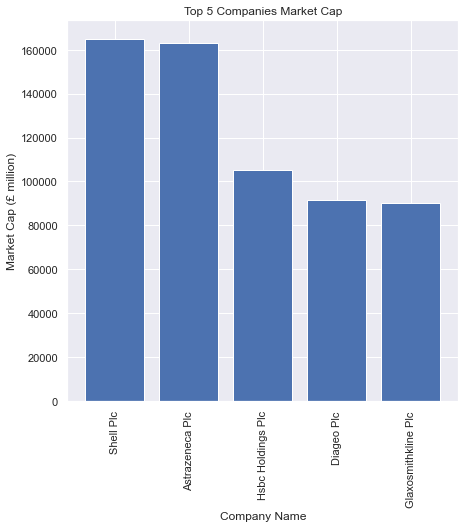

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme
sns.set_theme()

# plot a bar chart
plt.figure(figsize=(7,7))

mc_x = top_5_mc['Company Name']
mc_y = top_5_mc['Market Cap (million)']

plt.xlabel('Company Name')
plt.ylabel('Market Cap (£ million)')
plt.title('Top 5 Companies Market Cap')

plt.xticks(rotation=90)

plt.bar(mc_x, mc_y)
plt.show()

##### Daily price chart for the top 5 market cap companies today

In [52]:
# 5 companies that are top market cap today
top_5_mc['Company Name']

0              Shell Plc
2        Astrazeneca Plc
4      Hsbc Holdings Plc
6             Diageo Plc
9    Glaxosmithkline Plc
Name: Company Name, dtype: object

In [53]:
daily_chart = result[['Date', 'Company Name', 'Price']]
daily_chart = daily_chart[daily_chart['Company Name'].isin(top_5_mc['Company Name'])].reset_index()
daily_chart.drop("index", axis=1, inplace=True)
daily_chart

,Date,Company Name,Price
0,2022-04-18,Diageo Plc,3963.5
1,2022-04-18,Hsbc Holdings Plc,522.4
2,2022-04-18,Shell Plc,2192.0
3,2022-04-18,Astrazeneca Plc,10536.0
4,2022-04-18,Glaxosmithkline Plc,1773.0
5,2022-04-19,Shell Plc,2228.0
6,2022-04-19,Hsbc Holdings Plc,525.6
7,2022-04-19,Astrazeneca Plc,10500.0
8,2022-04-19,Glaxosmithkline Plc,1759.6
9,2022-04-19,Diageo Plc,3867.5


In [54]:
# pivot data to plot by company by tranposing data
daily_plot = daily_chart.pivot_table('Price', 'Date' , ['Company Name'])
daily_plot

Company Name,Astrazeneca Plc,Diageo Plc,Glaxosmithkline Plc,Hsbc Holdings Plc,Shell Plc
Date,,,,,
2022-04-18,10536.0,3963.5,1773.0,522.4,2192.0
2022-04-19,10500.0,3867.5,1759.6,525.6,2228.0


Text(0, 0.5, 'Price (£)')

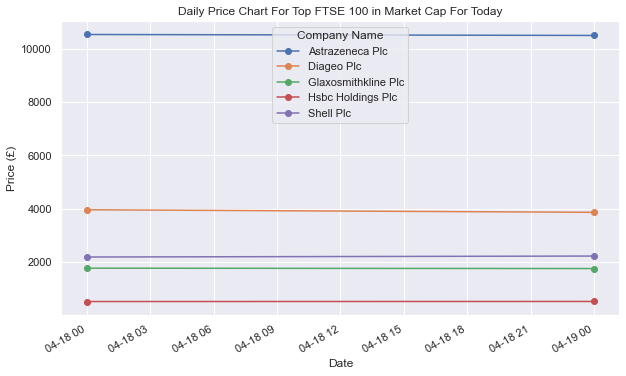

In [55]:
# data will become more populated as days pass
from matplotlib import rcParams

# make it bigger
rcParams['figure.figsize'] = 10,6

# plot
daily_plot.plot(marker='o')

# labelling
plt.title('Daily Price Chart For Top FTSE 100 in Market Cap For Today')
plt.xlabel('Date')
plt.ylabel("Price (£)")

##### What companies have the highest turnover on the 18th of April 2022

In [56]:
turnover_pivot = result.pivot_table('Turnover', index=['Company Name', 'Date'], aggfunc='max').sort_values(by=['Turnover'], ascending=[False]).reset_index()
top_5_turnover_may_18_22 = turnover_pivot[turnover_pivot['Date'] == '2022-04-18'].head(5)
top_5_turnover_may_18_22

,Company Name,Date,Turnover
1,Shell Plc,2022-04-18,2.344532e+08
2,Astrazeneca Plc,2022-04-18,1.803387e+08
5,Hsbc Holdings Plc,2022-04-18,1.369114e+08
7,Glaxosmithkline Plc,2022-04-18,1.281644e+08
10,Glencore Plc,2022-04-18,1.238208e+08


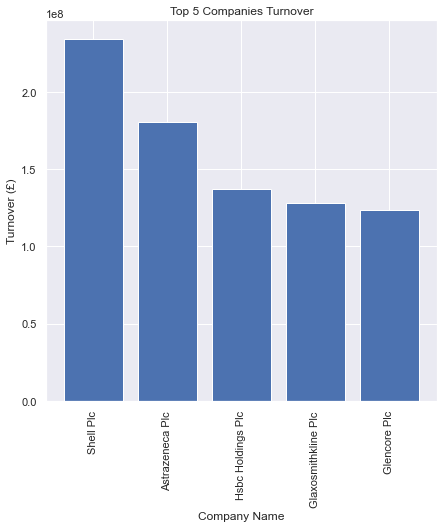

In [57]:
# plot a bar chart
plt.figure(figsize=(7,7))

turnover_x = top_5_turnover_may_18_22['Company Name']
turnover_y = top_5_turnover_may_18_22['Turnover']

plt.xlabel('Company Name')
plt.ylabel('Turnover (£)')
plt.title('Top 5 Companies Turnover')

plt.xticks(rotation=90)

plt.bar(turnover_x, turnover_y)
plt.show()

##### What companies saw the biggest percentage change (positive and negative) today

In [58]:
highest_positive_pc = result.pivot_table('Percentage Change', index=['Company Name', 'Date'], aggfunc='max').sort_values(by=['Percentage Change'], ascending=[False]).reset_index()
highest_positive_pc = highest_positive_pc[highest_positive_pc['Date'] == today].head(1)
print(highest_positive_pc)

highest_negative_pc = result.pivot_table('Percentage Change', index=['Company Name', 'Date'], aggfunc='max').sort_values(by=['Percentage Change'], ascending=[True]).reset_index()
highest_negative_pc = highest_negative_pc[highest_negative_pc['Date'] == today].head(1)
print(highest_negative_pc)

       Company Name       Date  Percentage Change
4  Smith Nephew Plc 2022-04-19               3.31
                     Company Name       Date  Percentage Change
1  Intermediate Capital Group Plc 2022-04-19              -4.55


In [59]:
highest_p = highest_positive_pc['Percentage Change'].values[0]
highest_n = highest_negative_pc['Percentage Change'].values[0]

In [60]:
# plot box plot to show better representation
pchange_box = daily_FTSE.pivot_table('Percentage Change', index=['Company Name', 'Date']).sort_values(by='Percentage Change', ascending=False).reset_index()
pchange_box = pchange_box[pchange_box['Date'] == today]

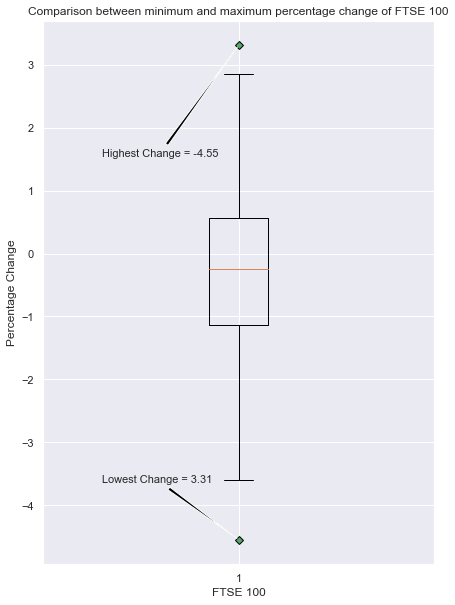

In [61]:
# plot box

# change outliers
green_diamond = dict(markerfacecolor='g', marker='D')

fig3, ax3 = plt.subplots(figsize=(7,10))
ax3.boxplot(pchange_box['Percentage Change'], flierprops=green_diamond)

ax3.set_title('Comparison between minimum and maximum percentage change of FTSE 100')
ax3.set_xlabel('FTSE 100')
ax3.set_ylabel('Percentage Change')

# annotate 
ax3.annotate(
    f'Lowest Change = {highest_p}',
    (1, highest_n),
    xytext=(0.15, 0.15),
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='wedge'),
    fontsize=11)
ax3.annotate(
    f'Highest Change = {highest_n}',
    (1, highest_p),
    xytext=(0.15, 0.75),
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='wedge'),
    fontsize=11)

plt.show()

##### What is the all time mean volume of FTSE 100

In [62]:
mean_volume = round(daily_FTSE['Volume'].mean())
mean_volume = f"{mean_volume:,}"
mean_volume_df = pd.DataFrame({'FTSE Mean Volume': [mean_volume]})
mean_volume_df

,FTSE Mean Volume
0,"10,441,736"


##### What company was issued the latest and has the highest market cap today

In [63]:
latest_company = result[['Date', 'Company Name', 'Issue Date', 'Market Cap (million)']]
latest_company = latest_company.sort_values(by=['Issue Date', 'Market Cap (million)'], ascending=[False,False]).reset_index()
latest_company = latest_company[latest_company['Date'] == today].head(5)
latest_company

,index,Date,Company Name,Issue Date,Market Cap (million)
0,111,2022-04-19,Shell Plc,2022-01-31,165107.16
1,206,2022-04-19,Shell Plc,2022-01-31,165107.16
4,201,2022-04-19,Jd Sports Fashion Plc,2021-11-30,7608.25
5,296,2022-04-19,Jd Sports Fashion Plc,2021-11-30,7608.25
6,133,2022-04-19,Berkeley Group Holdings The Plc,2021-09-06,4443.40


##### Compare the top company to the next 4 companies

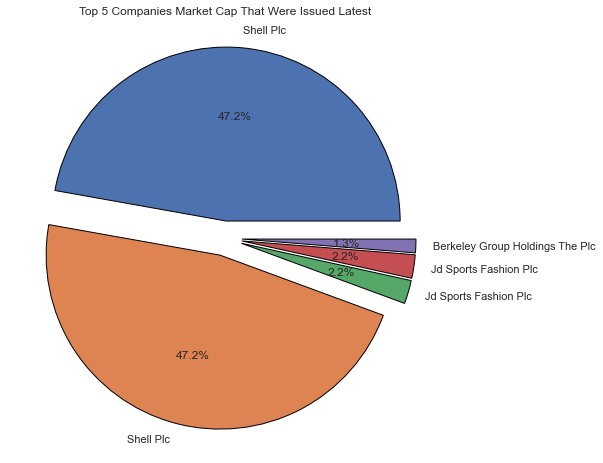

In [64]:
# explode.. make pie chart apart
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

# plot a bar chart
plt.figure(figsize=(8,8))

# bar chart
plt.pie(latest_company['Market Cap (million)'], labels=latest_company['Company Name'], autopct='%1.1f%%', explode=explode, wedgeprops={'edgecolor': 'black'})

# title
plt.title('Top 5 Companies Market Cap That Were Issued Latest')
plt.ticklabel_format(style='plain', axis='y')

##### What company has the highest turnover as well as positive earnings per share  today

In [65]:
turnover_eps = result[['Date', 'Company Name', 'Turnover', 'Earnings Per Share']]
turnover_eps_1 = turnover_eps[(turnover_eps['Earnings Per Share'] > 0) & (turnover_eps['Date'] == today)].sort_values(by=['Turnover', 'Earnings Per Share'], ascending=[False,False]).reset_index()
turnover_eps_1.head(5)

,index,Date,Company Name,Turnover,Earnings Per Share
0,111,2022-04-19,Shell Plc,3.069739e+08,2.59
1,206,2022-04-19,Shell Plc,3.069739e+08,2.59
2,159,2022-04-19,Astrazeneca Plc,1.616057e+08,0.08
3,254,2022-04-19,Astrazeneca Plc,1.616057e+08,0.08
4,198,2022-04-19,Diageo Plc,1.569152e+08,1.14


#### What company has the highest product of turnover and earnings per share today

In [66]:
turnover_eps['Turnover * EPS'] = turnover_eps['Turnover'] * turnover_eps['Earnings Per Share']
turnover_eps_2 = turnover_eps[turnover_eps['Date'] == today]
turnover_eps_2 = turnover_eps_2.sort_values(by='Turnover * EPS', ascending=False)
turnover_eps_2 = turnover_eps_2.head(5)
turnover_eps_2

<ipython-input-66-839af2414ee4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnover_eps['Turnover * EPS'] = turnover_eps['Turnover'] * turnover_eps['Earnings Per Share']


,Date,Company Name,Turnover,Earnings Per Share,Turnover * EPS
213,2022-04-19,Pershing Square Holdings Ltd,1.785353e+06,2017.00,3.601057e+09
118,2022-04-19,Pershing Square Holdings Ltd,1.785353e+06,2017.00,3.601057e+09
182,2022-04-19,Prudential Plc,4.071240e+07,81.60,3.322132e+09
277,2022-04-19,Prudential Plc,4.071240e+07,81.60,3.322132e+09
273,2022-04-19,Rio Tinto Plc,1.271827e+08,13.03,1.657191e+09


##### Compare the top company to the next 4 companies

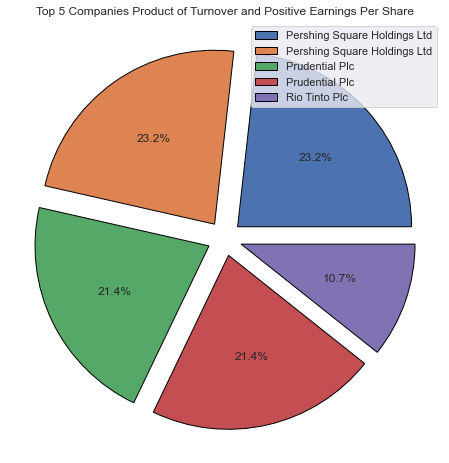

In [67]:
# explode.. make pie chart apart
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

# plot a bar chart
plt.figure(figsize=(8,8))

# bar chart
plt.pie(turnover_eps_2['Turnover * EPS'], autopct='%1.1f%%', explode=explode, wedgeprops={'edgecolor': 'black'})

# title
plt.title('Top 5 Companies Product of Turnover and Positive Earnings Per Share')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(turnover_eps_2['Company Name'])
plt.show()

## Historical FTSE 100 Analysis

###  Load data in

In [68]:
historical = pd.read_csv(r"C:\Users\Abdulkadir\Documents\Programming\Personal\DataScience\historicalftse100.csv")
historical

,Date,Price,Open,High,Low,Vol.,Change %
0,"Oct 15, 2020","5,832.52","5,935.06","5,935.06","5,786.20",665.02M,-1.73%
1,"Oct 14, 2020","5,935.06","5,969.71","6,009.81","5,926.49",612.91M,-0.58%
2,"Oct 13, 2020","5,969.71","6,001.38","6,008.04","5,949.97",786.88M,-0.53%
3,"Oct 12, 2020","6,001.38","6,016.65","6,037.08","5,995.11",600.96M,-0.25%
4,"Oct 09, 2020","6,016.65","5,978.03","6,040.47","5,978.03",676.78M,0.65%
...,...,...,...,...,...,...,...
4994,"Jan 09, 2001","6,088.10","6,149.60","6,195.90","6,066.40",-,-1.00%
4995,"Jan 08, 2001","6,149.60","6,198.10","6,212.40","6,137.70",-,-0.78%
4996,"Jan 05, 2001","6,198.10","6,185.60","6,239.60","6,155.00",-,0.20%
4997,"Jan 04, 2001","6,185.60","6,039.90","6,195.30","6,039.90",-,2.41%


### Clean data

In [69]:
# change date to datetime
historical['Date'] = pd.to_datetime(historical['Date'])

In [70]:
# make new columns for month and year
historical['Month'] = historical['Date'].dt.month
historical['Year'] = historical['Date'].dt.year

####  remove M and B from vol and make it to a number

In [71]:
def converter(x):
    if 'M' in x:
        return f"{(float(x.strip('M'))*1000000):,.2f}"
    elif 'B' in x:
        return f"{(float(x.strip('B'))*1000000000):,.2f}"

In [72]:
# remove M and B from vol and make it to a number
historical['Vol.'] = historical['Vol.'].apply(lambda x: converter(x))

In [73]:
historical.head()

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,"5,832.52","5,935.06","5,935.06","5,786.20","665,020,000.00",-1.73%,10,2020
1,2020-10-14,"5,935.06","5,969.71","6,009.81","5,926.49","612,910,000.00",-0.58%,10,2020
2,2020-10-13,"5,969.71","6,001.38","6,008.04","5,949.97","786,880,000.00",-0.53%,10,2020
3,2020-10-12,"6,001.38","6,016.65","6,037.08","5,995.11","600,960,000.00",-0.25%,10,2020
4,2020-10-09,"6,016.65","5,978.03","6,040.47","5,978.03","676,780,000.00",0.65%,10,2020


##### remove percentage signs

In [74]:
historical['Change %'] = historical['Change %'].str.strip('%')

In [75]:
historical.head()

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,"5,832.52","5,935.06","5,935.06","5,786.20","665,020,000.00",-1.73,10,2020
1,2020-10-14,"5,935.06","5,969.71","6,009.81","5,926.49","612,910,000.00",-0.58,10,2020
2,2020-10-13,"5,969.71","6,001.38","6,008.04","5,949.97","786,880,000.00",-0.53,10,2020
3,2020-10-12,"6,001.38","6,016.65","6,037.08","5,995.11","600,960,000.00",-0.25,10,2020
4,2020-10-09,"6,016.65","5,978.03","6,040.47","5,978.03","676,780,000.00",0.65,10,2020


##### Change string to floats

In [76]:
historical_FTSE = historical

In [77]:
# the negative signs in earnings per share causing problems with conversion to float
historical_FTSE['Change %'] = historical_FTSE['Change %'].replace('-',np.nan)

In [78]:
# Change datatype of all strings that look like numbers to actual numbers
historical_FTSE[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']] = historical_FTSE[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']].apply(lambda x: x.str.replace(',','').astype(float))
historical_FTSE

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,5832.52,5935.06,5935.06,5786.20,665020000.0,-1.73,10,2020
1,2020-10-14,5935.06,5969.71,6009.81,5926.49,612910000.0,-0.58,10,2020
2,2020-10-13,5969.71,6001.38,6008.04,5949.97,786880000.0,-0.53,10,2020
3,2020-10-12,6001.38,6016.65,6037.08,5995.11,600960000.0,-0.25,10,2020
4,2020-10-09,6016.65,5978.03,6040.47,5978.03,676780000.0,0.65,10,2020
...,...,...,...,...,...,...,...,...,...
4994,2001-01-09,6088.10,6149.60,6195.90,6066.40,NaN,-1.00,1,2001
4995,2001-01-08,6149.60,6198.10,6212.40,6137.70,NaN,-0.78,1,2001
4996,2001-01-05,6198.10,6185.60,6239.60,6155.00,NaN,0.20,1,2001
4997,2001-01-04,6185.60,6039.90,6195.30,6039.90,NaN,2.41,1,2001


### Analysis

#### Yearly price chart

In [98]:
historical_yearly = historical_FTSE.pivot_table('Price', index=['Date'])

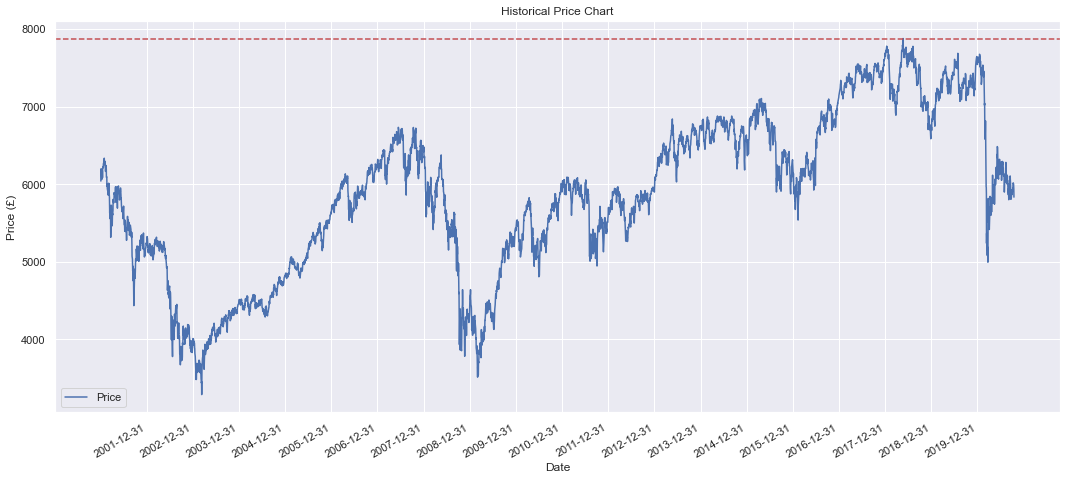

In [112]:
# make it bigger
rcParams['figure.figsize'] = 18,8

# plot
historical_yearly.plot()

# labelling
plt.title('Historical Price Chart')
plt.xlabel('Date')
plt.ylabel("Price (£)")

# x ticks
date_day = pd.date_range(start='2001-01-03', end='2020-10-15', freq='Y')
plt.xticks(date_day)

# plot maximum price value
max_price_y = historical_FTSE['Price'].max()


# horizontal line
plt.axhline(y=max_price_y, color='r', linestyle='--')


plt.show()

#### Volume Chart

In [106]:
# find out when the NaN stops
no_NaN = historical_FTSE[historical_FTSE['Vol.'].notnull()]
no_NaN

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,5832.52,5935.06,5935.06,5786.20,6.650200e+08,-1.73,10,2020
1,2020-10-14,5935.06,5969.71,6009.81,5926.49,6.129100e+08,-0.58,10,2020
2,2020-10-13,5969.71,6001.38,6008.04,5949.97,7.868800e+08,-0.53,10,2020
3,2020-10-12,6001.38,6016.65,6037.08,5995.11,6.009600e+08,-0.25,10,2020
4,2020-10-09,6016.65,5978.03,6040.47,5978.03,6.767800e+08,0.65,10,2020
...,...,...,...,...,...,...,...,...,...
2316,2011-08-18,5092.23,5331.60,5331.60,5041.59,1.180000e+09,-4.49,8,2011
2317,2011-08-17,5331.60,5357.63,5371.08,5279.93,6.719400e+08,-0.49,8,2011
2318,2011-08-16,5357.63,5350.58,5362.15,5265.83,7.163800e+08,0.13,8,2011
2319,2011-08-15,5350.58,5320.03,5377.23,5319.38,6.956400e+08,0.57,8,2011


In [100]:
historical_vol = historical_FTSE.pivot_table('Vol.', index=['Date'])

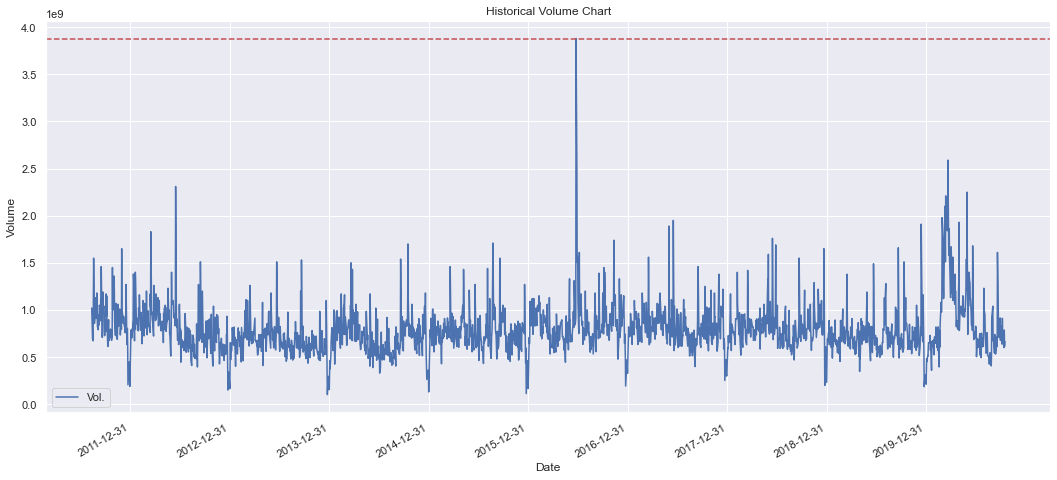

In [109]:
# make it bigger
rcParams['figure.figsize'] = 18,8

# plot
historical_vol.plot()

# labelling
plt.title('Historical Volume Chart')
plt.xlabel('Date')
plt.ylabel("Volume")

# x ticks
date_day = pd.date_range(start='2011-08-12', end='2020-10-15', freq='Y')
plt.xticks(date_day)

# plot maximum volume value
max_vol = historical_FTSE['Vol.'].max()

# horizontal line
plt.axhline(y=max_vol, color='r', linestyle='--')

plt.show()